<a href="https://colab.research.google.com/github/najibur-rahman/Machine-Learning/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = datasets.cifar10
type(df)

module

In [3]:
(x_train, y_train),(x_test, y_test) = df.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plot_sample(x,y, index):
  print(y[index])
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

4


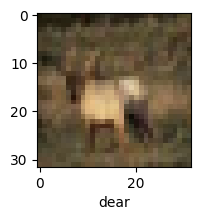

In [9]:
plot_sample(x_train, y_train, 3)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #input layer
    layers.Dense(2500, activation='relu'),#HIDDEN LAYER
    layers.Dense(1000, activation='relu'),#HIDDEN LAYER
    layers.Dense(10, activation='softmax')#output layer
]) #input layer a kunu shomoy parameter thake na

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2500)           │     7,682,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     2,501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,193,510 (38.89 MB)

 Trainable params: 10,193,510 (38.89 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ann.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
ann.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
153/782 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.1563 - loss: 5.2477

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

**CNN**

In [ ]:
cnn = models.Sequential([])

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.summary()

In [ ]:
cnn.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'rmsprop',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [ ]:
cnn.evaluate(x_test, y_test)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

In [ ]:
y_test[:5]